<a href="https://colab.research.google.com/github/namhawon/2024_Study02/blob/main/10_%EB%B9%84%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **차원 축소**

## MNIST Dataset을 활용한 차원 축소 실습

In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 1.8 MB/s eta 0:00:00


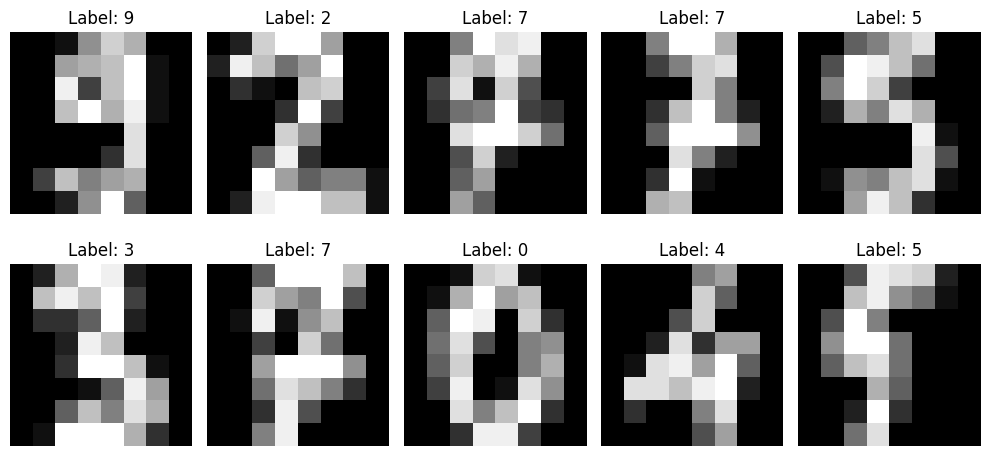

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

# Digits 데이터셋 로드
digits = load_digits()
X = digits.images
y = digits.target

# 무작위로 10개의 이미지를 선택하여 시각화
num_images = 10
random_indices = np.random.choice(len(X), num_images, replace=False)
random_images = X[random_indices]
random_labels = y[random_indices]

# 이미지 시각화
plt.figure(figsize=(10, 5))
for i, (image, label) in enumerate(zip(random_images, random_labels)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


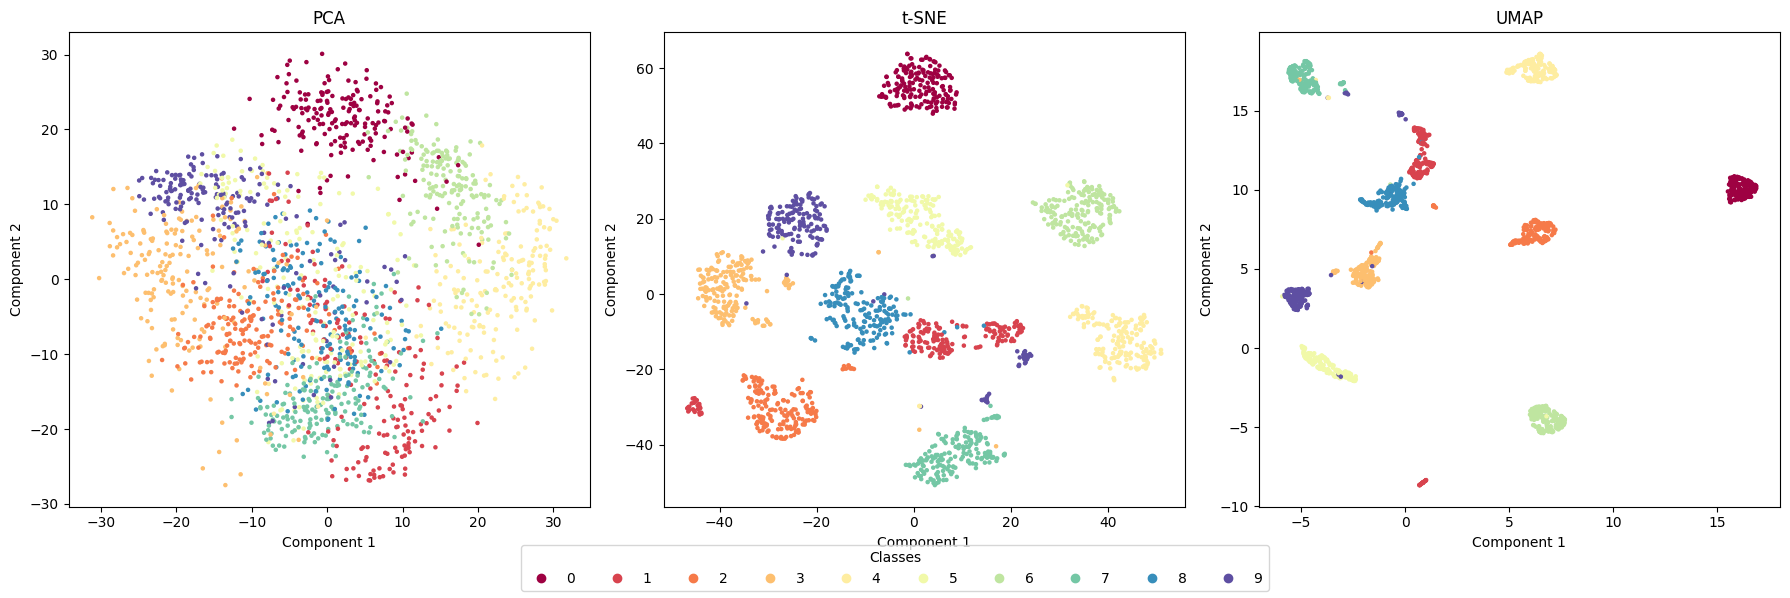

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# 데이터 로드
digits = load_digits()
X = digits.data
y = digits.target

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X)

# 시각화 함수
def plot_embeddings(X_pca, X_tsne, X_umap, y):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    embeddings = [(X_pca, "PCA"), (X_tsne, "t-SNE"), (X_umap, "UMAP")]

    for ax, (X, title) in zip(axes, embeddings):
        scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='Spectral', s=5)
        ax.set_title(title)
        ax.set_xlabel('Component 1')
        ax.set_ylabel('Component 2')

    # 범례를 하단에 추가
    handles, labels = scatter.legend_elements()
    fig.legend(handles, labels, title="Classes", loc='lower center', ncol=10)

    plt.tight_layout(rect=[0, 0.05, 1, 1])
    plt.show()

# 시각화
plot_embeddings(X_pca, X_tsne, X_umap, y)


## PCA Components에 따른 모델 성능

In [ ]:
import pandas as pd

univ_df = pd.read_excel("대학주요정보.xlsx")

In [ ]:
univ_df.drop(columns = ['No', 'university_name', 'campus_name', 'school_type',
                        'school_category', 'establishment_type'], inplace = True)

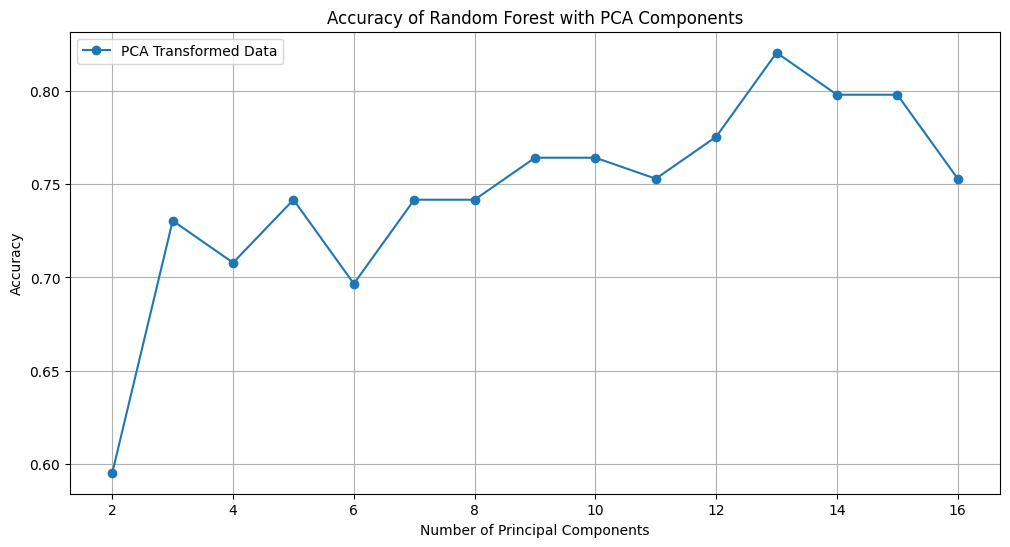

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

# 'region_name' 컬럼을 기준으로 그룹화
def categorize_region(region):
    if region == '서울':
        return 'Seoul'
    elif region in ['인천', '경기']:
        return 'Metropolitan Area'
    else:
        return 'Non-Metropolitan Area'

univ_df['region_category'] = univ_df['region_name'].apply(categorize_region)

# 입력과 출력 데이터 분리
X = univ_df.drop(columns=['freshman_enrollment_rate_2023', 'region_name', 'region_category'])
y = univ_df['freshman_enrollment_rate_2023']
region_labels = univ_df['region_category']

# 데이터 분할
X_train, X_test, y_train, y_test, region_train, region_test = train_test_split(X, y, region_labels, test_size=0.2, random_state=42)

# 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest 모델 정확도 계산
accuracy_scores = []

for n in range(2, X_train_scaled.shape[1] + 1):
    # PCA 적용
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Random Forest 모델 학습 및 예측
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_pca, region_train)
    y_pred = model.predict(X_test_pca)

    # 정확도 계산
    accuracy = accuracy_score(region_test, y_pred)
    accuracy_scores.append(accuracy)

# 정확도 변화를 라인 그래프로 시각화
plt.figure(figsize=(12, 6))
plt.plot(range(2, X_train_scaled.shape[1] + 1), accuracy_scores, marker='o', label='PCA Transformed Data')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.title('Accuracy of Random Forest with PCA Components')
plt.legend()
plt.grid(True)
plt.show()


# **군집화**

## make_blobs를 활용한 군집화 실습

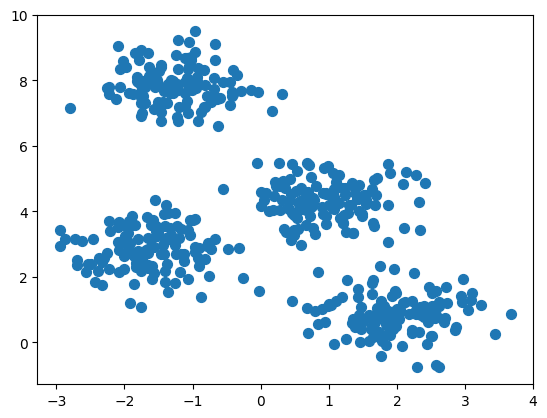

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# 샘플 데이터 생성
X, y = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()


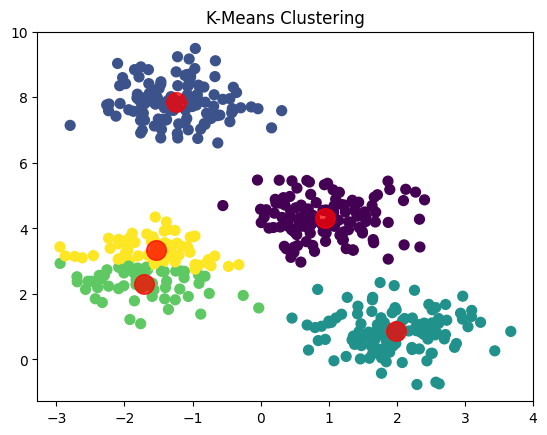

In [ ]:
from sklearn.cluster import KMeans

# K-Means Clustering
kmeans = KMeans(n_clusters=4, n_init = 10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.title("K-Means Clustering")
plt.show()


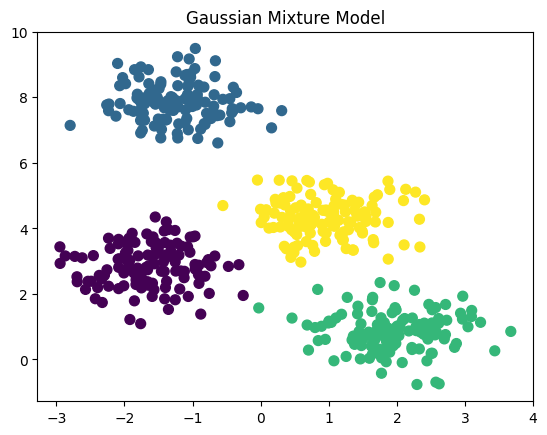

In [ ]:
from sklearn.mixture import GaussianMixture

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=4)
gmm.fit(X)
y_gmm = gmm.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_gmm, s=50, cmap='viridis')
plt.title("Gaussian Mixture Model")
plt.show()


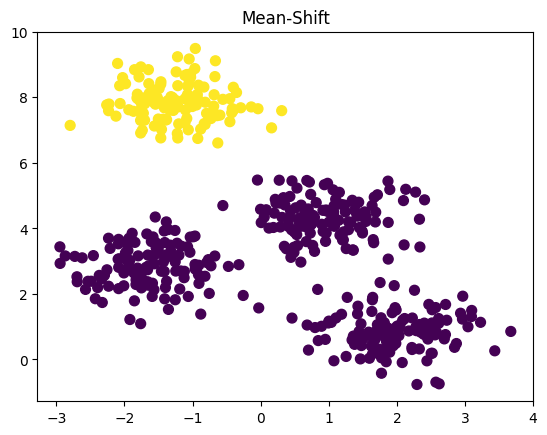

In [ ]:
from sklearn.cluster import MeanShift

# Mean-Shift
mean_shift = MeanShift()
mean_shift.fit(X)
y_mean_shift = mean_shift.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_mean_shift, s=50, cmap='viridis')
plt.title("Mean-Shift")
plt.show()


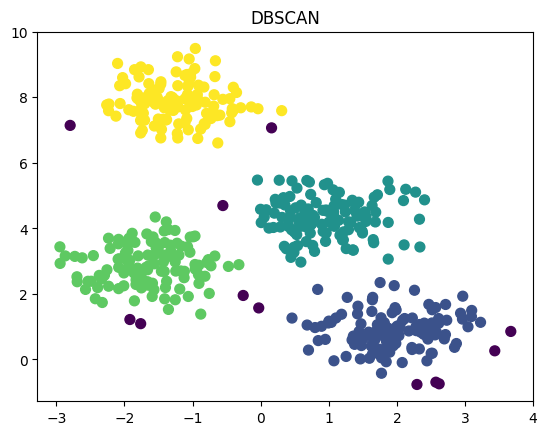

In [ ]:
from sklearn.cluster import DBSCAN

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=50, cmap='viridis')
plt.title("DBSCAN")
plt.show()


## Iris Data를 활용한 군집화 실습

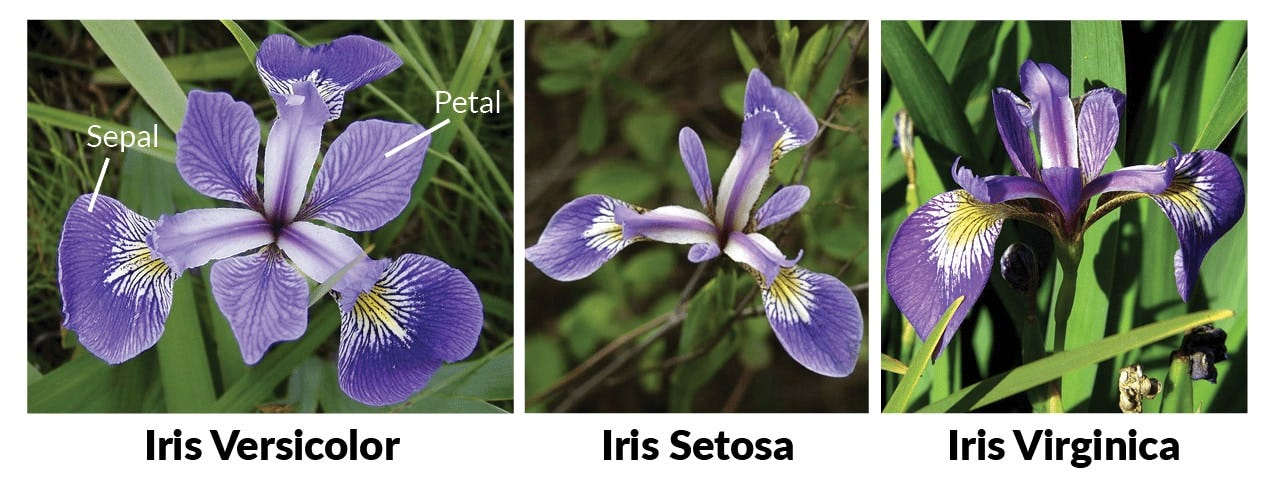

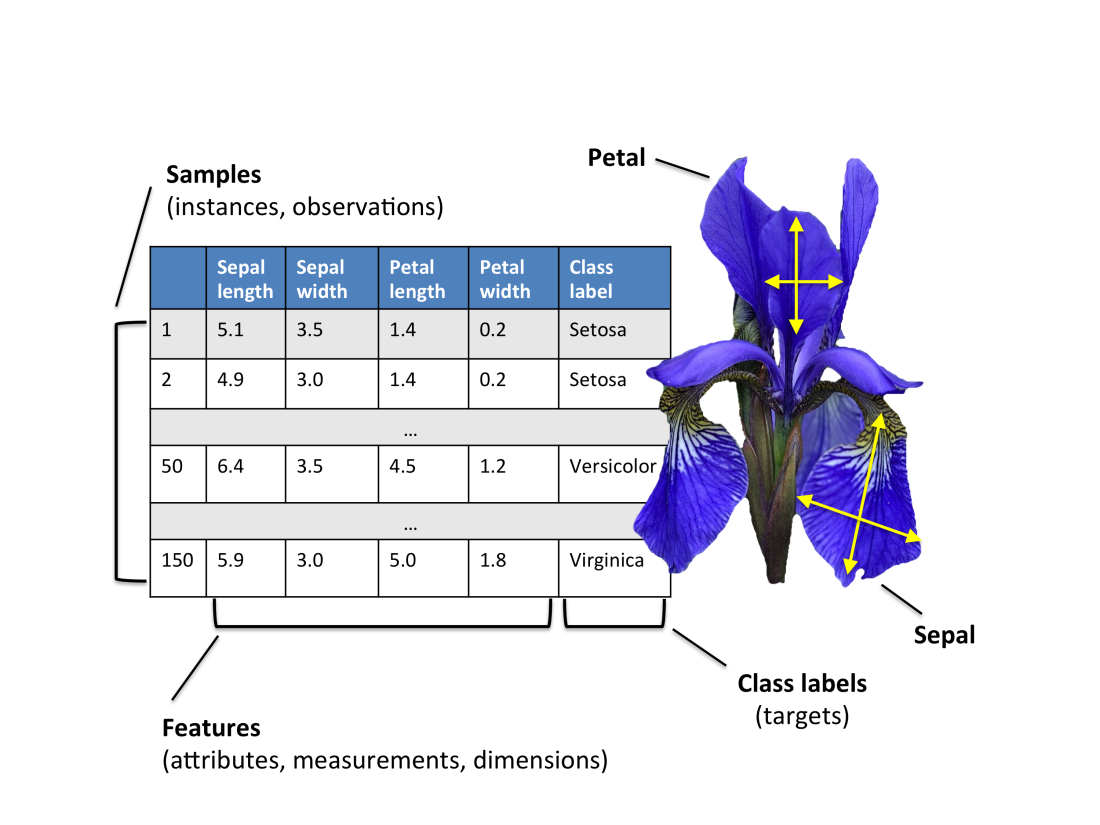

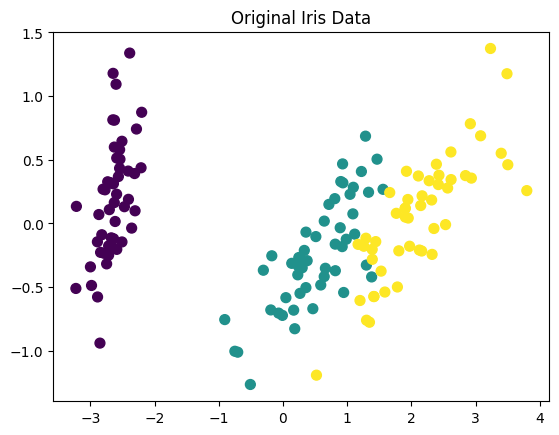

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

# Iris 데이터셋 로드
iris = datasets.load_iris()
X = iris.data
y = iris.target

# PCA를 사용하여 2D로 변환
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 원본 데이터 시각화
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=50, cmap='viridis')
plt.title("Original Iris Data")
plt.show()

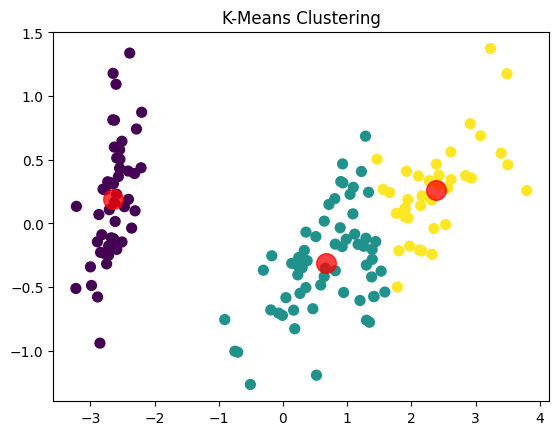

In [ ]:
from sklearn.cluster import KMeans

# K-Means Clustering
kmeans = KMeans(n_clusters=3,n_init=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.title("K-Means Clustering")
plt.show()


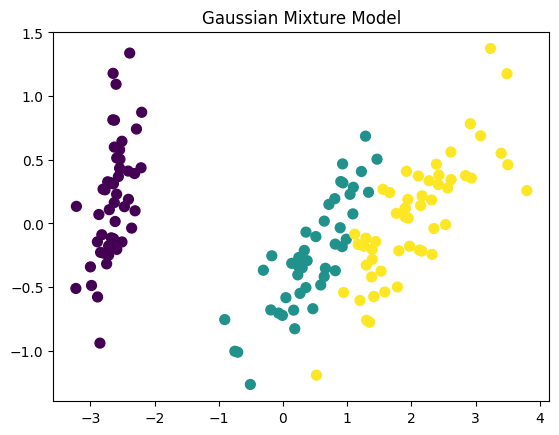

In [ ]:
from sklearn.mixture import GaussianMixture

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
y_gmm = gmm.predict(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_gmm, s=50, cmap='viridis')
plt.title("Gaussian Mixture Model")
plt.show()


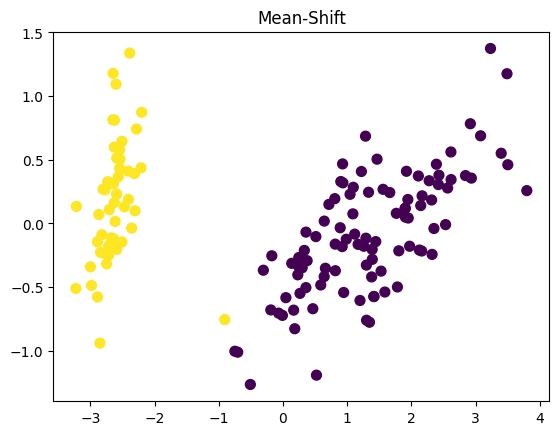

In [ ]:
from sklearn.cluster import MeanShift

# Mean-Shift
mean_shift = MeanShift()
mean_shift.fit(X)
y_mean_shift = mean_shift.predict(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_mean_shift, s=50, cmap='viridis')
plt.title("Mean-Shift")
plt.show()


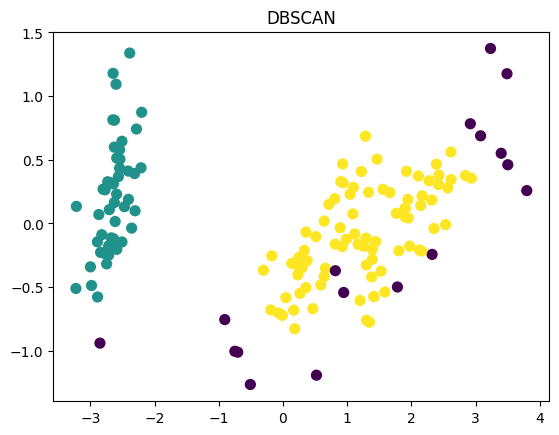

In [ ]:
from sklearn.cluster import DBSCAN

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_dbscan, s=50, cmap='viridis')
plt.title("DBSCAN")
plt.show()


## 차원 축소 기법에 따른 군집화 결과 비교

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


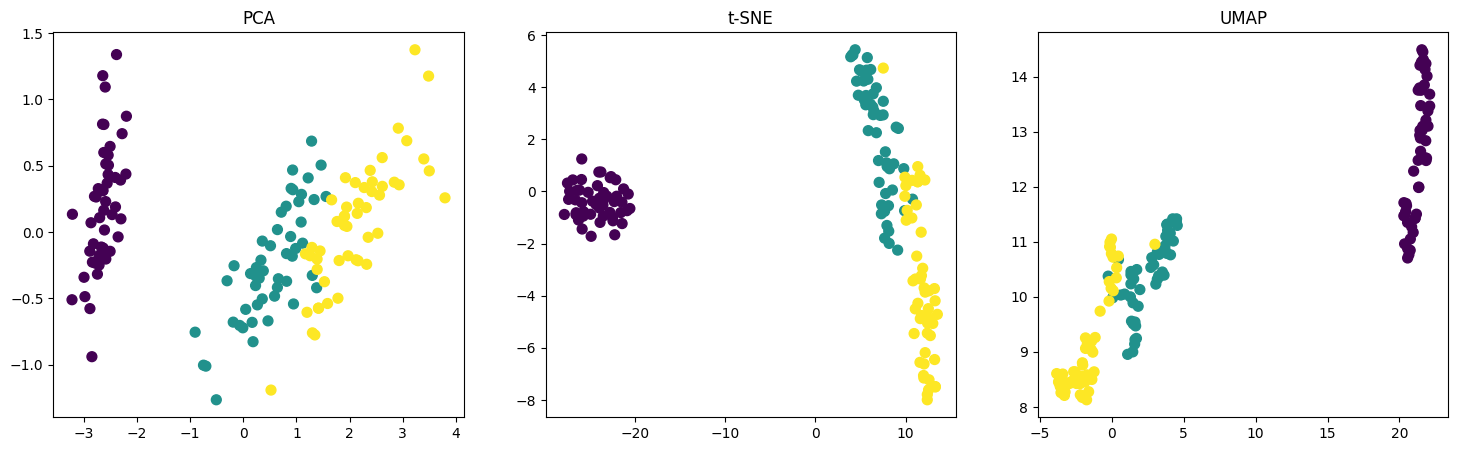

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# Iris 데이터셋 로드
iris = datasets.load_iris()
X = iris.data
y = iris.target

# PCA 변환
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# t-SNE 변환
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)

# UMAP 변환
umap_model = umap.UMAP(n_components=2, random_state=0)
X_umap = umap_model.fit_transform(X)

# 원본 데이터 시각화
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=50, cmap='viridis')
ax[0].set_title("PCA")
ax[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, s=50, cmap='viridis')
ax[1].set_title("t-SNE")
ax[2].scatter(X_umap[:, 0], X_umap[:, 1], c=y, s=50, cmap='viridis')
ax[2].set_title("UMAP")
plt.show()


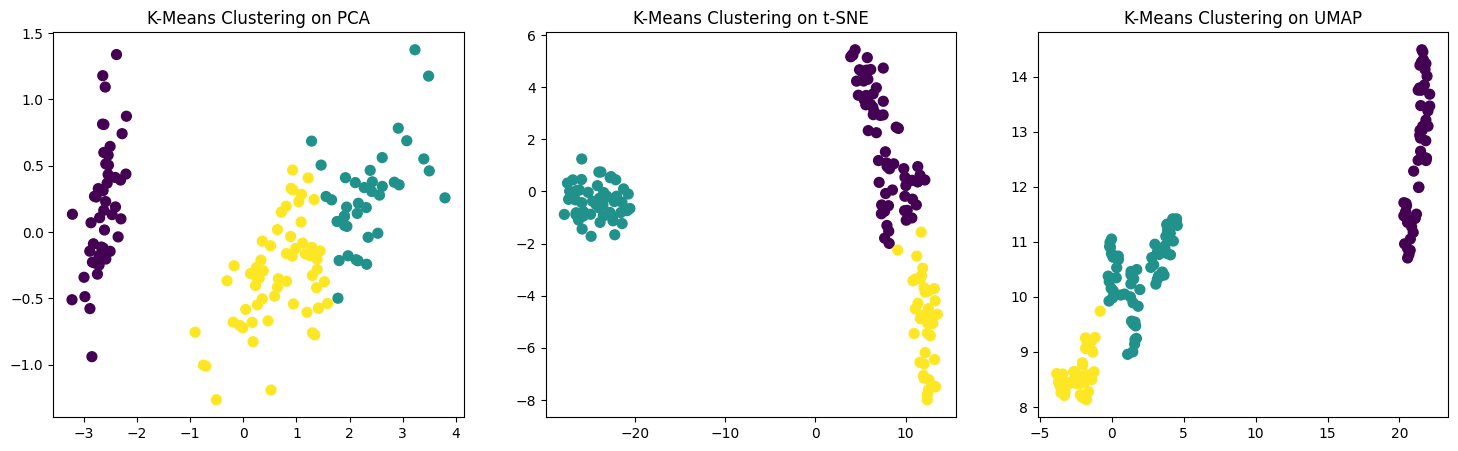

In [ ]:
from sklearn.cluster import KMeans

# K-Means Clustering
kmeans_pca = KMeans(n_clusters=3, random_state=0,n_init=10)
y_kmeans_pca = kmeans_pca.fit_predict(X_pca)

kmeans_tsne = KMeans(n_clusters=3, random_state=0,n_init=10)
y_kmeans_tsne = kmeans_tsne.fit_predict(X_tsne)

kmeans_umap = KMeans(n_clusters=3, random_state=0,n_init=10)
y_kmeans_umap = kmeans_umap.fit_predict(X_umap)

# 시각화
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans_pca, s=50, cmap='viridis')
ax[0].set_title("K-Means Clustering on PCA")
ax[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_kmeans_tsne, s=50, cmap='viridis')
ax[1].set_title("K-Means Clustering on t-SNE")
ax[2].scatter(X_umap[:, 0], X_umap[:, 1], c=y_kmeans_umap, s=50, cmap='viridis')
ax[2].set_title("K-Means Clustering on UMAP")
plt.show()


## 대학의 군집화

In [ ]:
import pandas as pd

univ_df = pd.read_excel("대학주요정보.xlsx")

In [ ]:
univ_df = univ_df[(univ_df['school_type'] == '대학') & (univ_df['school_category'] == '대학교') & ((univ_df['campus_name'] == '본교') | (univ_df['campus_name'] == '분교'))].drop(['campus_name', 'school_type', 'school_category', 'establishment_type'], axis = 1)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


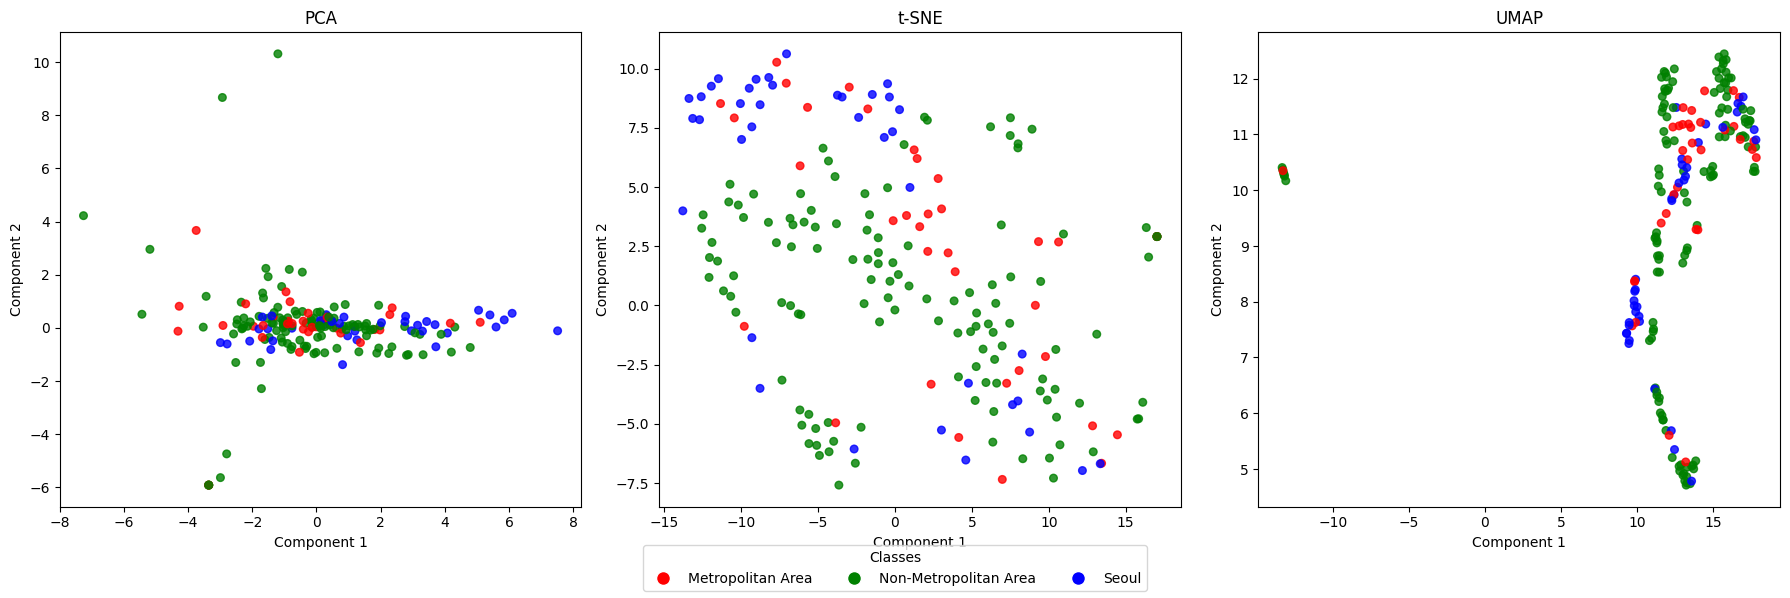

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 'region_name' 컬럼을 기준으로 그룹화
def categorize_region(region):
    if region == '서울':
        return 'Seoul'
    elif region in ['인천', '경기']:
        return 'Metropolitan Area'
    else:
        return 'Non-Metropolitan Area'

univ_df['region_category'] = univ_df['region_name'].apply(categorize_region)

# 범주형 데이터를 숫자형으로 변환
le = LabelEncoder()
region_encoded = le.fit_transform(univ_df['region_category'])

# 입력 데이터에서 필요한 컬럼 선택
X = univ_df.drop(columns=['No', 'university_name', 'region_name', 'freshman_enrollment_rate_2023', 'region_category'])

# 수치형 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_scaled)

# 시각화 함수
def plot_embeddings(X_pca, X_tsne, X_umap, y, region_names):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    embeddings = [(X_pca, "PCA"), (X_tsne, "t-SNE"), (X_umap, "UMAP")]

    cmap = mcolors.ListedColormap(['red', 'green', 'blue'])
    norm = mcolors.BoundaryNorm([0, 1, 2, 3], cmap.N)

    for ax, (X, title) in zip(axes, embeddings):
        scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, norm=norm, s=30, alpha=0.8)
        ax.set_title(title)
        ax.set_xlabel('Component 1')
        ax.set_ylabel('Component 2')

    # 범례를 하단에 추가
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i), markersize=10) for i in range(len(region_names))]
    labels = region_names
    fig.legend(handles, labels, title="Classes", loc='lower center', ncol=3)

    plt.tight_layout(rect=[0, 0.05, 1, 1])
    plt.show()

# 시각화
plot_embeddings(X_pca, X_tsne, X_umap, region_encoded, le.classes_)


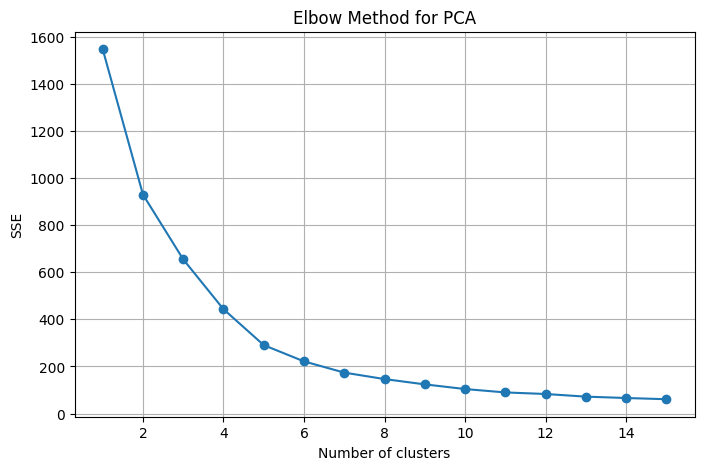

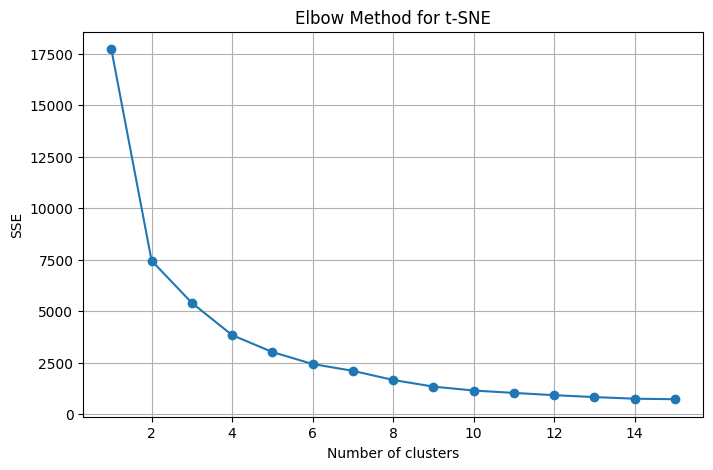

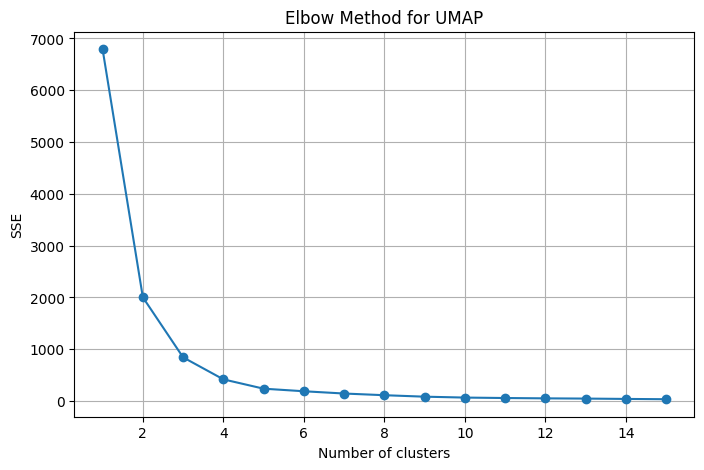

In [ ]:
from sklearn.cluster import KMeans

def calculate_sse(data, max_k=15):
    sse = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init = 10)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    return sse

# 각 차원 축소 방법에 대해 SSE 계산
sse_pca = calculate_sse(X_pca)
sse_tsne = calculate_sse(X_tsne)
sse_umap = calculate_sse(X_umap)

# SSE 변화 시각화
def plot_elbow_method(sse, title):
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(sse)+1), sse, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('SSE')
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_elbow_method(sse_pca, 'Elbow Method for PCA')
plot_elbow_method(sse_tsne, 'Elbow Method for t-SNE')
plot_elbow_method(sse_umap, 'Elbow Method for UMAP')

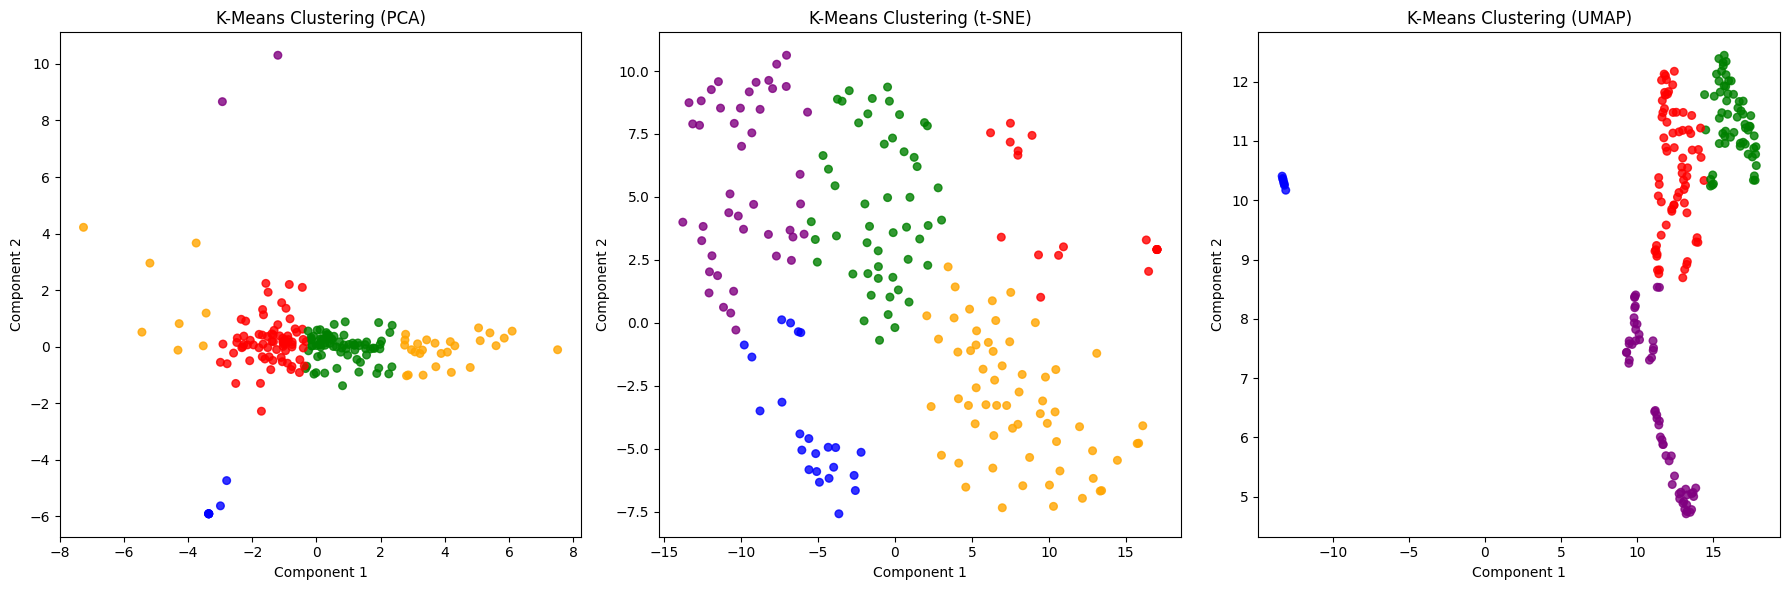

In [ ]:
# 최적 K 찾기 (Elbow Method 결과를 바탕으로 수동으로 설정)
optimal_k_pca = 6  # 예시 값, 실제로 Elbow Method 결과를 보고 결정
optimal_k_tsne = 6  # 예시 값
optimal_k_umap = 4  # 예시 값

# K-Means 클러스터링 수행
kmeans_pca = KMeans(n_clusters=optimal_k_pca, random_state=42, n_init = 10).fit(X_pca)
kmeans_tsne = KMeans(n_clusters=optimal_k_tsne, random_state=42, n_init = 10).fit(X_tsne)
kmeans_umap = KMeans(n_clusters=optimal_k_umap, random_state=42, n_init = 10).fit(X_umap)

# 클러스터 레이블
labels_pca = kmeans_pca.labels_
labels_tsne = kmeans_tsne.labels_
labels_umap = kmeans_umap.labels_

# 시각화 함수
def plot_kmeans_clusters(X_pca, X_tsne, X_umap, labels_pca, labels_tsne, labels_umap):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    embeddings = [(X_pca, labels_pca, "PCA"), (X_tsne, labels_tsne, "t-SNE"), (X_umap, labels_umap, "UMAP")]

    cmap = mcolors.ListedColormap(['red', 'green', 'blue', 'purple', 'orange'])
    norm = mcolors.BoundaryNorm([0, 1, 2, 3, 4, 5], cmap.N)

    for ax, (X, labels, title) in zip(axes, embeddings):
        scatter = ax.scatter(X[:, 0], X[:, 1], c=labels, cmap=cmap, norm=norm, s=30, alpha=0.8)
        ax.set_title(f'K-Means Clustering ({title})')
        ax.set_xlabel('Component 1')
        ax.set_ylabel('Component 2')

    plt.tight_layout()
    plt.show()

# 시각화
plot_kmeans_clusters(X_pca, X_tsne, X_umap, labels_pca, labels_tsne, labels_umap)


In [ ]:
# 클러스터 레이블
univ_df['cluster_pca'] = kmeans_pca.labels_
univ_df['cluster_tsne'] = kmeans_tsne.labels_
univ_df['cluster_umap'] = kmeans_umap.labels_

In [ ]:
univ_df

,No,university_name,region_name,undergrad_admission_quota_2023,undergrad_graduates_2023,full_time_faculty_2023,undergrad_students_2023,freshman_competition_rate_2023,freshman_enrollment_rate_2023,employment_rate_2023,...,faculty_teaching_ratio_2023,scholarship_per_student_2023,annual_tuition_2024,education_cost_per_student_2023,dorm_capacity_rate_2023,books_per_student_2023,region_category,cluster_pca,cluster_tsne,cluster_umap
2,3,가야대학교(김해),경남,460,523,76,1698,6.8,82.2,70.7,...,69.4,3774750.9,6867.3,13360.3,34.5,123.1,Non-Metropolitan Area,0,4,1
3,4,가천대학교,경기,4131,3846,938,20563,16.8,100.0,69.7,...,61.2,3565844.8,8342.9,15810.9,14.8,54.2,Metropolitan Area,4,3,3
4,5,가톨릭관동대학교,강원,1644,1768,389,5939,3.7,60.4,64.3,...,78.2,3715715.0,7206.1,13167.2,37.5,102.0,Non-Metropolitan Area,1,1,0
5,6,가톨릭꽃동네대학교,충북,108,92,23,411,7.5,97.3,79.8,...,72.6,5680676.4,7465.4,18531.8,42.8,141.7,Non-Metropolitan Area,0,4,1
8,9,가톨릭대학교,경기,1574,1501,268,7240,13.2,99.9,66.0,...,59.9,3425471.1,7094.2,28703.8,21.6,109.6,Metropolitan Area,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,435,호남대학교,광주,1537,1892,280,6610,4.9,85.8,67.5,...,88.5,3987267.6,6581.7,11685.0,21.4,96.2,Non-Metropolitan Area,1,1,0
435,436,호남신학대학교,광주,119,120,36,434,1.2,87.4,46.4,...,48.2,5121352.1,6941.0,9430.2,43.2,261.8,Non-Metropolitan Area,0,5,1
437,438,호서대학교,충남,2881,2709,474,12368,5.2,100.1,68.0,...,73.1,3808922.8,7759.5,13469.4,23.4,80.4,Non-Metropolitan Area,1,3,0
439,440,홍익대학교,서울,2421,2888,533,12365,18.1,99.9,68.5,...,66.3,3922393.0,8400.8,13033.1,13.0,86.7,Seoul,4,3,3


In [ ]:
# 각 클러스터의 대학명 출력 함수
def print_clustered_universities(df, cluster_column, max_cluster):
    for cluster in range(max_cluster + 1):
        universities = df[df[cluster_column] == cluster]['university_name'].unique()
        print(f"\n{cluster_column} {cluster}:")
        print(universities)

print("PCA Clusters:")
print_clustered_universities(univ_df, 'cluster_pca', 5)

print("\nt-SNE Clusters:")
print_clustered_universities(univ_df, 'cluster_tsne', 5)

print("\nUMAP Clusters:")
print_clustered_universities(univ_df, 'cluster_umap', 3)

PCA Clusters:

cluster_pca 0:
['가야대학교(김해)' '가톨릭꽃동네대학교' '감리교신학대학교' '강서대학교' '건양대학교' '경남과학기술대학교' '경동대학교'
 '경운대학교' '고신대학교' '광신대학교' '광주과학기술원' '광주대학교' '광주여자대학교' '국립강릉원주대학교'
 '국립금오공과대학교' '국립목포대학교' '국립목포해양대학교' '국립안동대학교' '국립한국해양대학교' '극동대학교' '김천대학교'
 '나사렛대학교' '남부대학교' '대구경북과학기술원' '대구예술대학교' '대신대학교' '동양대학교' '루터대학교' '목포가톨릭대학교'
 '부산가톨릭대학교' '부산장신대학교' '서울기독대학교' '서울신학대학교' '서울장신대학교' '서울한영대학교' '성공회대학교'
 '세한대학교' '송원대학교' '신경주대학교' '신한대학교' '아신대학교' '안양대학교' '영남신학대학교' '예수대학교'
 '예원예술대학교' '울산과학기술원' '위덕대학교' '유원대학교' '장로회신학대학교' '제주국제대학교' '중원대학교'
 '차의과학대학교' '창신대학교' '초당대학교' '총신대학교' '추계예술대학교' '칼빈대학교' '평택대학교' '포항공과대학교'
 '한경국립대학교' '한국과학기술원' '한국교원대학교' '한국기술교육대학교' '한국성서대학교' '한국전통문화대학교' '한국체육대학교'
 '한국침례신학대학교' '한동대학교' '한라대학교' '한세대학교' '한신대학교' '한일장신대학교' '협성대학교' '호남신학대학교'
 '화성의과학대학교']

cluster_pca 1:
['가톨릭관동대학교' '가톨릭대학교' '강남대학교' '강원대학교' '건국대학교(글로컬)' '경기대학교' '경남대학교'
 '경상국립대학교' '경성대학교' '경일대학교' '고려대학교(세종)' '광운대학교' '국립공주대학교' '국립군산대학교'
 '국립부경대학교' '국립순천대학교' '국립창원대학교' '국립한국교통대학교' '국립한밭대학교' '남서울대학교' '단국대학교'
 '대구가톨릭대학교' '대구한의대학교' '대전대학교'

# **과제**

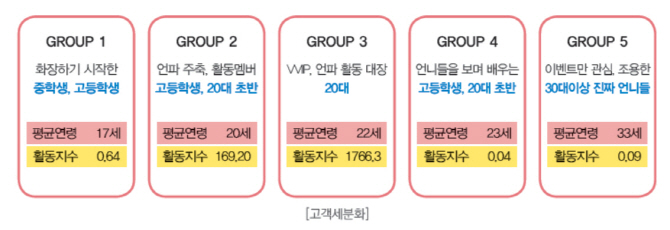

**과제 설명**

지금까지 배운 것을 활용하여 대학을 군집화하고, 각 군집에 대해서 특징을 생각해 이름을 붙여봅시다.

데이터 전처리는 자유이며, 군집 분리의 용이함을 위해 미리 필터링하고 대학을 군집화해도 무방합니다.

생각해 볼 수 있는 데이터 전처리: 로그 변환, 이산화, 범주형 변수의 활용, 이상치 처리 등

이름을 붙이기 위해서는 데이터 시각화, 그리고 기본적인 데이터 분석 (groupby의 사용 등)이 필요할 수 있습니다. 아니면 해석력이 높은 지도학습 기법 (로지스틱 회귀, 의사결정나무 등)을 사용하여 인사이트를 얻을 수 있습니다.

**평가 기준**

1. 대학을 군집화하였고, 이름을 붙였는가? (50점)

2. 군집화 하는 과정에서 수행된 데이터 전처리 / 시각화 / 분석 등이 적절한가? (50점 만점으로 정성평가)

**보너스 점수**
1. 군집화 결과가 우리에게 인사이트를 주는가? (20점 만점으로 정성평가)